(quick-start)=

# Quick start

A short code example using several end-user functionalities of GeoUtils. For a more detailed example of all features,
have a look at the {ref}`feature-overview` page! Or, to find an example about
a specific functionality, jump to {ref}`quick-gallery` right below.

## Short example

```{note}
:class: margin

Most functions examplified here normally require many lines of code using several independent packages with inconsistent
geospatial syntax and volatile passing of metadata that can lead to errors!

In GeoUtils, **these higher-level operations are tested to ensure robustness and consistency**. 🙂
```

The package functionalities revolve around the
{class}`~geoutils.Raster` and {class}`~geoutils.Vector` classes, from which most methods can be called.
Below, in a few lines, we load a raster and a vector, crop them to a common extent, re-assign raster values around
a buffer of the vector, perform calculations on the modified raster, and finally plot and save it!

<!--- An empty margin to add some vertical padding --->
```{margin}
&nbsp;
```


```{note}
:class: margin

**We notice a ``Userwarning``:** No nodata value was defined in the GeoTIFF file, so GeoUtils automatically defined
one compatible with the data type to use during operations.
```

/home/docs/checkouts/readthedocs.org/user_builds/geoutils/checkouts/stable/geoutils/raster/raster.py:2949: UserWarning: No nodata set, will use default value of -99999
  warnings.warn(f"No nodata set, will use default value of {nodata}")


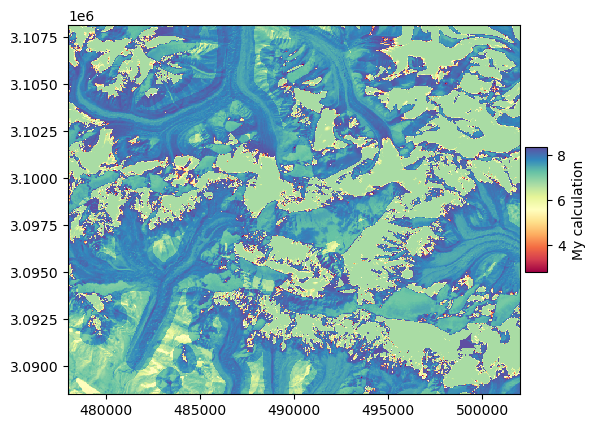

In [1]:
import geoutils as gu

# Examples files: paths to a GeoTIFF file and an ESRI shapefile
filename_rast = gu.examples.get_path("everest_landsat_b4")
filename_vect = gu.examples.get_path("everest_rgi_outlines")

# Open files by instantiating Raster and Vector
# (Rasters are loaded lazily = only metadata but not array unless required)
rast = gu.Raster(filename_rast)
vect = gu.Vector(filename_vect)

# Crop raster to vector's extent by simply passing vector as "match-reference"
rast = rast.crop(vect)

# Buffer the vector by 500 meters no matter its current projection system
vect_buff = vect.buffer_metric(500)

# Create mask of vector on same grid/CRS as raster using it as "match-reference"
mask_buff = vect_buff.create_mask(rast)

# Re-assign values of pixels in the mask while performing a sum
# (Now the raster loads implicitly)
rast[mask_buff] += 50
import numpy as np
calc_rast = np.log(rast / 2) + 3.5

# Plot raster and vector, using raster as projection-reference for vector
calc_rast.plot(cmap='Spectral', cbar_title='My calculation')
vect_buff.plot(calc_rast, fc='none', ec='k', lw=0.5)

# Save to file
calc_rast.save("mycalc.tif")

In [2]:
import os
os.remove("mycalc.tif")

(quick-gallery)=
## More examples

To dive into more illustrated code, explore our gallery of examples that is composed of:
- An {ref}`examples-io` section on opening, saving, loading, importing and exporting,
- An {ref}`examples-handling` section on geotransformations (crop, reproject) and raster-vector interfacing,
- An {ref}`examples-analysis` section on analysis tools and raster numerics.

See also the full concatenated list of examples below.

```{eval-rst}
.. minigallery:: geoutils.Raster
    :add-heading: Examples using rasters and vectors
```